In [22]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('E:\internship\cloths-rating.csv')
df.head()

,ProductID,UserID,Rating,Text
0,777,AV1YnR7wglJLPUi8IJmi,4,Great taffy at a great price.
1,767,AVpfpK8KLJeJML43BCuD,4,Absolutely wonderful - silky and sexy and comf...
2,1080,AVqkIdntQMlgsOJE6fuB,5,Love this dress! it's sooo pretty.
3,1077,AVpfpK8KLJeJML43BCuD,3,I had such high hopes for this dress and reall...
4,1049,AVpfpK8KLJeJML43BCuD,5,"I love, love, love this jumpsuit. it's fun, fl..."


In [4]:
from textblob import TextBlob

In [5]:
def sentiment(text):
    try:
        return TextBlob(str(text)).sentiment.polarity
    except:
        return None
df['sentiment']=df['Text'].apply(sentiment)
df

,ProductID,UserID,Rating,Text,sentiment
0,777,AV1YnR7wglJLPUi8IJmi,4,Great taffy at a great price.,0.800000
1,767,AVpfpK8KLJeJML43BCuD,4,Absolutely wonderful - silky and sexy and comf...,0.633333
2,1080,AVqkIdntQMlgsOJE6fuB,5,Love this dress! it's sooo pretty.,0.437500
3,1077,AVpfpK8KLJeJML43BCuD,3,I had such high hopes for this dress and reall...,0.120000
4,1049,AVpfpK8KLJeJML43BCuD,5,"I love, love, love this jumpsuit. it's fun, fl...",0.550000
...,...,...,...,...,...
629,823,B08GWV3SM6,1,I placed order 4+1 soaps.But I have received w...,0.000000
630,823,B08GWV3SM6,3,"The soap is ok for bathing, no scent at all, m...",0.325000
631,847,B08GWV3SM6,5,For a long time I was searching for Indian soa...,-0.025000
632,910,AVph0EeEilAPnD_x9myq,3,Good but not great,0.150000


In [6]:
df['Updated_score']=df['Rating']*df['sentiment']
df

,ProductID,UserID,Rating,Text,sentiment,Updated_score
0,777,AV1YnR7wglJLPUi8IJmi,4,Great taffy at a great price.,0.800000,3.200000
1,767,AVpfpK8KLJeJML43BCuD,4,Absolutely wonderful - silky and sexy and comf...,0.633333,2.533333
2,1080,AVqkIdntQMlgsOJE6fuB,5,Love this dress! it's sooo pretty.,0.437500,2.187500
3,1077,AVpfpK8KLJeJML43BCuD,3,I had such high hopes for this dress and reall...,0.120000,0.360000
4,1049,AVpfpK8KLJeJML43BCuD,5,"I love, love, love this jumpsuit. it's fun, fl...",0.550000,2.750000
...,...,...,...,...,...,...
629,823,B08GWV3SM6,1,I placed order 4+1 soaps.But I have received w...,0.000000,0.000000
630,823,B08GWV3SM6,3,"The soap is ok for bathing, no scent at all, m...",0.325000,0.975000
631,847,B08GWV3SM6,5,For a long time I was searching for Indian soa...,-0.025000,-0.125000
632,910,AVph0EeEilAPnD_x9myq,3,Good but not great,0.150000,0.450000


In [7]:
def classify_scores(a):
    if a<= -0.25:
        v=1
    elif a<=1:
        v=2
    elif a<=2:
        v=3
    elif a<=3:
        v=4
    elif a<=5:
        v=5
    return v

df['new_score']= df['Updated_score'].apply(classify_scores)
df

,ProductID,UserID,Rating,Text,sentiment,Updated_score,new_score
0,777,AV1YnR7wglJLPUi8IJmi,4,Great taffy at a great price.,0.800000,3.200000,5
1,767,AVpfpK8KLJeJML43BCuD,4,Absolutely wonderful - silky and sexy and comf...,0.633333,2.533333,4
2,1080,AVqkIdntQMlgsOJE6fuB,5,Love this dress! it's sooo pretty.,0.437500,2.187500,4
3,1077,AVpfpK8KLJeJML43BCuD,3,I had such high hopes for this dress and reall...,0.120000,0.360000,2
4,1049,AVpfpK8KLJeJML43BCuD,5,"I love, love, love this jumpsuit. it's fun, fl...",0.550000,2.750000,4
...,...,...,...,...,...,...,...
629,823,B08GWV3SM6,1,I placed order 4+1 soaps.But I have received w...,0.000000,0.000000,2
630,823,B08GWV3SM6,3,"The soap is ok for bathing, no scent at all, m...",0.325000,0.975000,2
631,847,B08GWV3SM6,5,For a long time I was searching for Indian soa...,-0.025000,-0.125000,2
632,910,AVph0EeEilAPnD_x9myq,3,Good but not great,0.150000,0.450000,2


In [8]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['UserID']=le.fit_transform(df['UserID'])
#df['ProductID']=le.fit_transform(df['ProductID'])
df

,ProductID,UserID,Rating,Text,sentiment,Updated_score,new_score
0,777,0,4,Great taffy at a great price.,0.800000,3.200000,5
1,767,3,4,Absolutely wonderful - silky and sexy and comf...,0.633333,2.533333,4
2,1080,13,5,Love this dress! it's sooo pretty.,0.437500,2.187500,4
3,1077,3,3,I had such high hopes for this dress and reall...,0.120000,0.360000,2
4,1049,3,5,"I love, love, love this jumpsuit. it's fun, fl...",0.550000,2.750000,4
...,...,...,...,...,...,...,...
629,823,41,1,I placed order 4+1 soaps.But I have received w...,0.000000,0.000000,2
630,823,41,3,"The soap is ok for bathing, no scent at all, m...",0.325000,0.975000,2
631,847,41,5,For a long time I was searching for Indian soa...,-0.025000,-0.125000,2
632,910,7,3,Good but not great,0.150000,0.450000,2


In [9]:
#productid nu label encoding bhi karvanu
df_pivot=df.pivot_table(index='ProductID',columns='UserID',values='new_score').fillna(0)
df_pivot

UserID,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
ProductID,,,,,,,,,,,,,,,,,,,,,
89,0.0,0.000000,0.000000,3.0,0.0,0.0,5.0,2.000000,2.000000,0.0,...,0.000000,3.00,0.0,0.0,0.000000,4.000000,0.000000,0.000000,0.000000,3.75
333,0.0,3.000000,0.000000,0.0,0.0,4.0,0.0,0.000000,4.333333,1.5,...,0.000000,1.00,3.0,0.0,0.000000,2.250000,0.000000,0.000000,0.000000,0.00
369,5.0,2.000000,0.000000,3.0,0.0,4.0,5.0,3.000000,0.000000,0.0,...,0.000000,0.00,0.0,0.0,0.000000,0.000000,1.333333,0.000000,5.000000,0.00
444,2.0,2.000000,0.000000,0.0,2.0,0.0,4.0,5.000000,2.000000,0.0,...,3.000000,0.00,3.5,0.0,0.000000,2.666667,0.000000,0.000000,3.666667,0.00
684,0.0,0.000000,4.000000,4.0,2.0,0.0,2.0,3.000000,2.000000,0.0,...,3.500000,0.00,4.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.00
697,0.0,2.000000,2.000000,0.0,0.0,0.0,5.0,0.000000,2.000000,2.0,...,4.000000,3.00,4.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.00
767,2.0,0.000000,0.000000,4.0,0.0,0.0,2.0,0.000000,0.000000,0.0,...,0.000000,2.00,0.0,0.0,3.000000,0.000000,2.000000,1.000000,0.000000,0.00
777,5.0,0.000000,0.000000,0.0,0.0,0.0,2.0,0.000000,0.000000,2.0,...,0.000000,1.00,0.0,0.0,0.000000,0.000000,5.000000,0.000000,0.000000,0.00
823,0.0,0.000000,0.000000,5.0,0.0,0.0,5.0,1.000000,0.000000,0.0,...,0.000000,5.00,0.0,0.0,0.000000,5.000000,0.000000,0.000000,0.000000,2.00


In [10]:
from scipy.sparse import csr_matrix

df_pivot_matrix=csr_matrix(df_pivot.values)
print(df_pivot_matrix)

  (0, 3)	3.0
  (0, 6)	5.0
  (0, 7)	2.0
  (0, 8)	2.0
  (0, 11)	4.0
  (0, 16)	3.5
  (0, 18)	3.4
  (0, 20)	2.0
  (0, 22)	5.0
  (0, 28)	4.0
  (0, 33)	3.0
  (0, 37)	4.0
  (0, 41)	3.75
  (1, 1)	3.0
  (1, 5)	4.0
  (1, 8)	4.333333333333333
  (1, 9)	1.5
  (1, 10)	2.0
  (1, 13)	2.6666666666666665
  (1, 17)	2.0
  (1, 22)	5.0
  (1, 25)	2.0
  (1, 29)	3.0
  (1, 33)	1.0
  (1, 34)	3.0
  :	:
  (25, 17)	4.5
  (25, 21)	2.0
  (25, 22)	2.0
  (25, 25)	2.6666666666666665
  (25, 30)	4.0
  (25, 38)	3.0
  (25, 40)	1.6666666666666667
  (26, 0)	2.0
  (26, 1)	3.0
  (26, 3)	3.0
  (26, 6)	2.0
  (26, 7)	3.5
  (26, 8)	2.0
  (26, 9)	2.0
  (26, 11)	3.0
  (26, 16)	3.0
  (26, 17)	2.2
  (26, 18)	3.0
  (26, 19)	1.0
  (26, 22)	2.0
  (26, 23)	2.0
  (26, 25)	4.0
  (26, 28)	3.0
  (26, 33)	3.25
  (26, 37)	2.25


# DAY11

In [11]:
similarity_matrix=cosine_similarity(df_pivot)
similarity_matrix

array([[1.        , 0.33180003, 0.34731885, 0.39380839, 0.54676023,
        0.41816981, 0.29605353, 0.31227489, 0.78846991, 0.35071361,
        0.16990336, 0.3141411 , 0.54150012, 0.44640812, 0.26513706,
        0.08735731, 0.27681686, 0.10227159, 0.19342442, 0.09882579,
        0.3852686 , 0.36294349, 0.18041067, 0.        , 0.52433909,
        0.17769639, 0.71075896],
       [0.33180003, 1.        , 0.4317589 , 0.29088282, 0.19310629,
        0.44027757, 0.17970091, 0.03840277, 0.24562995, 0.26150968,
        0.12734076, 0.2106256 , 0.39948681, 0.47368644, 0.39699107,
        0.25267484, 0.16365961, 0.12325556, 0.37357534, 0.        ,
        0.25313087, 0.20203635, 0.18434039, 0.        , 0.39145634,
        0.37185258, 0.42543225],
       [0.34731885, 0.4317589 , 1.        , 0.41152506, 0.20979493,
        0.35668523, 0.53740406, 0.41814325, 0.38282082, 0.37308693,
        0.16638389, 0.23113097, 0.33222111, 0.26840271, 0.26285977,
        0.37745334, 0.10029936, 0.37370127, 0.3107

In [12]:
Matrix=np.ones((27,27))
for i1,num in enumerate(similarity_matrix):
    for i2,num2 in enumerate(num):
        num2="%.2f"%num2
        Matrix[i1][i2]=num2
        
Matrix

array([[1.  , 0.33, 0.35, 0.39, 0.55, 0.42, 0.3 , 0.31, 0.79, 0.35, 0.17,
        0.31, 0.54, 0.45, 0.27, 0.09, 0.28, 0.1 , 0.19, 0.1 , 0.39, 0.36,
        0.18, 0.  , 0.52, 0.18, 0.71],
       [0.33, 1.  , 0.43, 0.29, 0.19, 0.44, 0.18, 0.04, 0.25, 0.26, 0.13,
        0.21, 0.4 , 0.47, 0.4 , 0.25, 0.16, 0.12, 0.37, 0.  , 0.25, 0.2 ,
        0.18, 0.  , 0.39, 0.37, 0.43],
       [0.35, 0.43, 1.  , 0.41, 0.21, 0.36, 0.54, 0.42, 0.38, 0.37, 0.17,
        0.23, 0.33, 0.27, 0.26, 0.38, 0.1 , 0.37, 0.31, 0.02, 0.34, 0.23,
        0.45, 0.  , 0.08, 0.37, 0.39],
       [0.39, 0.29, 0.41, 1.  , 0.64, 0.57, 0.34, 0.36, 0.31, 0.35, 0.42,
        0.41, 0.62, 0.57, 0.61, 0.44, 0.29, 0.12, 0.49, 0.  , 0.54, 0.48,
        0.33, 0.  , 0.15, 0.27, 0.49],
       [0.55, 0.19, 0.21, 0.64, 1.  , 0.59, 0.27, 0.23, 0.38, 0.32, 0.4 ,
        0.36, 0.57, 0.45, 0.46, 0.35, 0.37, 0.14, 0.48, 0.08, 0.36, 0.27,
        0.14, 0.1 , 0.12, 0.08, 0.45],
       [0.42, 0.44, 0.36, 0.57, 0.59, 1.  , 0.38, 0.23, 0.52, 0.5

In [13]:
from sklearn.neighbors import NearestNeighbors

model_knn=NearestNeighbors(metric='cosine',n_neighbors=20,radius=1)
model_knn.fit(df_pivot_matrix)

NearestNeighbors(metric='cosine', n_neighbors=20, radius=1)

1. Data Gathering
2. Data Analysis
3. Data Cleaning
4. Data pre processing
    4.1 Encoding
    4.2 Transformation
        4.2.1 Normalization
        4.2.2 Standardization
5. Feature Selection
6. Feature Extraction
7. Model Building
8. Evaluation

In [14]:
product_ID=int(input('Enter Product ID:'))
data=df_pivot.index.to_list()
data

Enter Product ID:369


[89,
 333,
 369,
 444,
 684,
 697,
 767,
 777,
 823,
 847,
 853,
 858,
 862,
 910,
 949,
 1002,
 1003,
 1049,
 1060,
 1065,
 1077,
 1080,
 1095,
 1120,
 6969,
 8001,
 9696]

In [15]:
query_index=data.index(product_ID)
print(query_index)

2


In [25]:
#shows nearest distance and its index
similarity, indices= model_knn.kneighbors(df_pivot.iloc[query_index,:].values.reshape(1,-1),n_neighbors=8)
print(similarity)
print(indices)

[[0.         0.46259594 0.54528107 0.5682411  0.58185675 0.58847494
  0.60748133 0.61717918]]
[[ 2  6 22  1  7  3 26  8]]


In [26]:
similarity.tolist(),indices.tolist()

([[0.0,
   0.4625959379319813,
   0.5452810721870891,
   0.5682411038466395,
   0.5818567479887755,
   0.5884749378471579,
   0.6074813344243606,
   0.6171791843333906]],
 [[2, 6, 22, 1, 7, 3, 26, 8]])

In [27]:
dict(zip(indices.tolist()[0],similarity.tolist()[0]))

{2: 0.0,
 6: 0.4625959379319813,
 22: 0.5452810721870891,
 1: 0.5682411038466395,
 7: 0.5818567479887755,
 3: 0.5884749378471579,
 26: 0.6074813344243606,
 8: 0.6171791843333906}

In [19]:
def polarity(a):
    if a<0:
        v='Negative'
    elif a==0:
        v='Neutral'
    elif a>0:
        v='Positive'
    return v
    
df['string']=df['sentiment'].apply(polarity)
df

,ProductID,UserID,Rating,Text,sentiment,Updated_score,new_score,string
0,777,0,4,Great taffy at a great price.,0.800000,3.200000,5,Positive
1,767,3,4,Absolutely wonderful - silky and sexy and comf...,0.633333,2.533333,4,Positive
2,1080,13,5,Love this dress! it's sooo pretty.,0.437500,2.187500,4,Positive
3,1077,3,3,I had such high hopes for this dress and reall...,0.120000,0.360000,2,Positive
4,1049,3,5,"I love, love, love this jumpsuit. it's fun, fl...",0.550000,2.750000,4,Positive
...,...,...,...,...,...,...,...,...
629,823,41,1,I placed order 4+1 soaps.But I have received w...,0.000000,0.000000,2,Neutral
630,823,41,3,"The soap is ok for bathing, no scent at all, m...",0.325000,0.975000,2,Positive
631,847,41,5,For a long time I was searching for Indian soa...,-0.025000,-0.125000,2,Negative
632,910,7,3,Good but not great,0.150000,0.450000,2,Positive


In [20]:
lst=df['string'].value_counts()

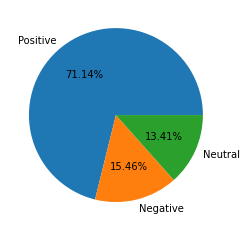

In [23]:
plt.pie(lst,labels=lst.index.tolist(), autopct='%.2f%%')
plt.show()

<BarContainer object of 6 artists>

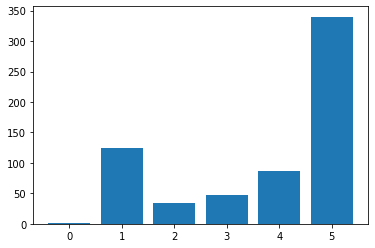

In [24]:
r=df['Rating'].value_counts()
r
plt.bar(r.index,r)

In [34]:
df_pivot.index[indices.flatten()]

Int64Index([369, 767, 1095, 333, 777, 444, 9696, 823], dtype='int64', name='ProductID')

In [38]:
#pd.DataFrame(df_pivot.index[indices.flatten()]

SyntaxError: unexpected EOF while parsing (725527543.py, line 1)

In [44]:
product_ID=int(input('Enter Product ID:'))
data=df_pivot.index.to_list()

similarity, indices= model_knn.kneighbors(df_pivot.iloc[query_index,:].values.reshape(1,-1),n_neighbors=8)
pd.DataFrame(df_pivot.index[indices.flatten()])

Enter Product ID:369


,ProductID
0,369
1,767
2,1095
3,333
4,777
5,444
6,9696
7,823


# or

In [46]:
P_ID=df_pivot.index[indices.flatten()]
dist=similarity.flatten()
rcmnd_lst=list(zip(P_ID,dist))
rcmnd_df=pd.DataFrame(rcmnd_lst,columns=['P_ID','distance'])
rcmnd_df

,P_ID,distance
0,369,0.000000
1,767,0.462596
2,1095,0.545281
3,333,0.568241
4,777,0.581857
5,444,0.588475
6,9696,0.607481
7,823,0.617179


In [65]:
import json
with open('E:\internship\dict.json','r') as f:
    p_dict= json.load(f)
pdict=p_dict

JSONDecodeError: Expecting property name enclosed in double quotes: line 2 column 5 (char 6)